In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [2]:
fake = pd.read_csv("Data/Fake.csv")
true = pd.read_csv("Data/True.csv")

In [3]:
true.shape
fake.shape

(23481, 4)

In [4]:
true.shape

(21417, 4)

Data cleaning and preparation


In [5]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [6]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [7]:
# Check the data
data.head()

,title,text,subject,date,target
0,MUST WATCH VIDEO! HERE’S THE MOST IMPORTANT AN...,Politics before anything else that s what Ob...,politics,"Jun 30, 2016",fake
1,WHOA! FOX NEWS HOST JUST BLAMED TRUMP For Viol...,Domestic terrorists are ramping up the violenc...,politics,"Apr 29, 2016",fake
2,Trump Insists His Muslim Ban Has Been ‘Going ...,Even though alleged president Donald Trump s e...,News,"February 5, 2017",fake
3,DECLASSIFIED US INTEL REPORT Used To Discredit...,A highly-anticipated declassified US intellige...,left-news,"Jan 7, 2017",fake
4,U.S. top court to set guidelines for Trump tre...,WASHINGTON (Reuters) - The U.S. Supreme Court ...,politicsNews,"February 17, 2017",true


In [8]:
# Removing the date (we won't use it for the analysis)
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,MUST WATCH VIDEO! HERE’S THE MOST IMPORTANT AN...,Politics before anything else that s what Ob...,politics,fake
1,WHOA! FOX NEWS HOST JUST BLAMED TRUMP For Viol...,Domestic terrorists are ramping up the violenc...,politics,fake
2,Trump Insists His Muslim Ban Has Been ‘Going ...,Even though alleged president Donald Trump s e...,News,fake
3,DECLASSIFIED US INTEL REPORT Used To Discredit...,A highly-anticipated declassified US intellige...,left-news,fake
4,U.S. top court to set guidelines for Trump tre...,WASHINGTON (Reuters) - The U.S. Supreme Court ...,politicsNews,true


In [9]:
# Removing the title (we will only use the text)
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,Politics before anything else that s what Ob...,politics,fake
1,Domestic terrorists are ramping up the violenc...,politics,fake
2,Even though alleged president Donald Trump s e...,News,fake
3,A highly-anticipated declassified US intellige...,left-news,fake
4,WASHINGTON (Reuters) - The U.S. Supreme Court ...,politicsNews,true


In [10]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,politics before anything else that s what ob...,politics,fake
1,domestic terrorists are ramping up the violenc...,politics,fake
2,even though alleged president donald trump s e...,News,fake
3,a highly-anticipated declassified us intellige...,left-news,fake
4,washington (reuters) - the u.s. supreme court ...,politicsNews,true


In [11]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [12]:
#Check
data.head()

,text,subject,target
0,politics before anything else that s what ob...,politics,fake
1,domestic terrorists are ramping up the violenc...,politics,fake
2,even though alleged president donald trump s e...,News,fake
3,a highlyanticipated declassified us intelligen...,left-news,fake
4,washington reuters the us supreme court will ...,politicsNews,true


In [13]:
# Removing stopwords
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download("stopwords")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/arshjain/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [15]:
data.head()

,text,subject,target
0,politics anything else obama clinton common pu...,politics,fake
1,domestic terrorists ramping violence innocent ...,politics,fake
2,even though alleged president donald trump exe...,News,fake
3,highlyanticipated declassified us intelligence...,left-news,fake
4,washington reuters us supreme court decide thr...,politicsNews,true


Basic data exploration

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


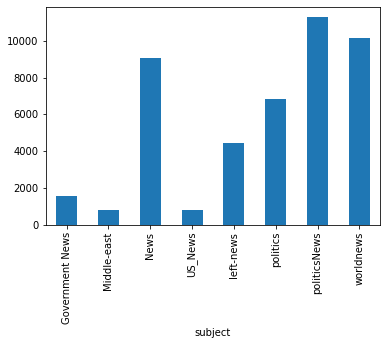

In [16]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


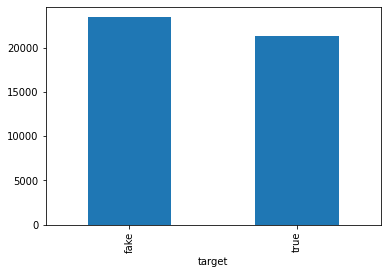

In [17]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

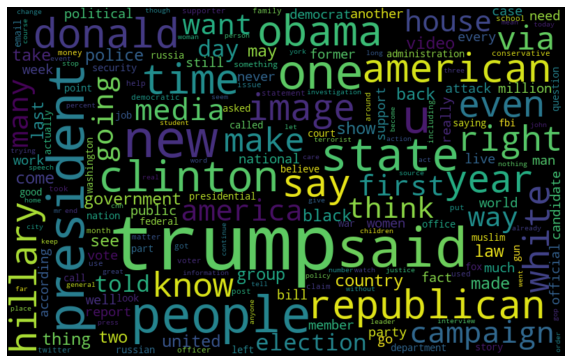

In [18]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

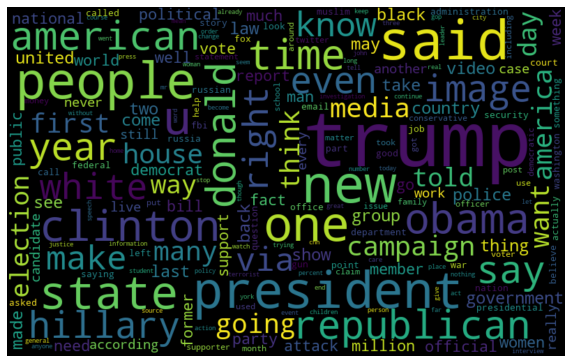

In [19]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

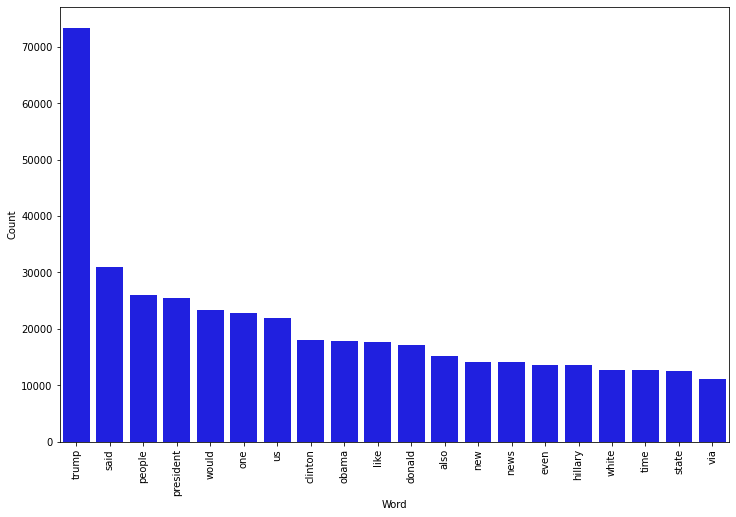

In [21]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

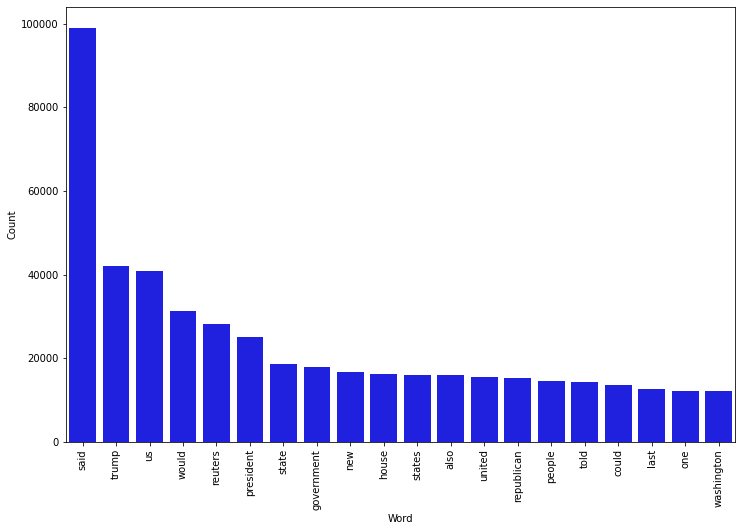

In [22]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

Modeling

In [23]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Peparing the data

In [24]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=7)

Naive Bayes



In [25]:
dct = dict()

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 94.93%


Confusion matrix, without normalization


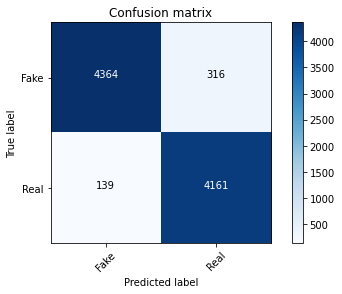

In [26]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

Logistic regression

In [27]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)


accuracy: 98.84%


Confusion matrix, without normalization


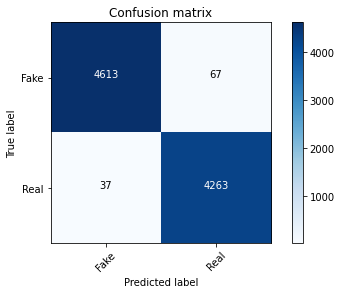

In [28]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.59%


Confusion matrix, without normalization


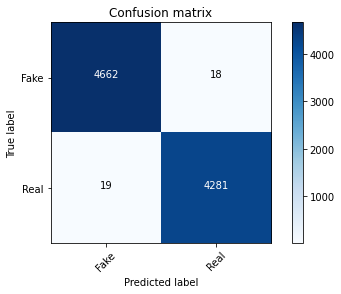

In [30]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])


Random Forest


In [31]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.11%


Confusion matrix, without normalization


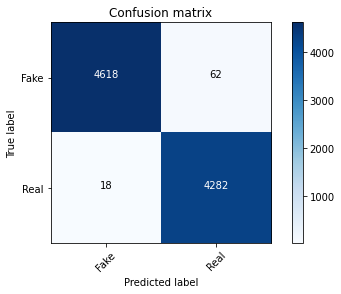

In [32]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

SVM

In [33]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
prediction = model.predict(X_test)

# Column standardization
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clf = Pipeline([('Scalar', StandardScaler(with_mean=False)),
               ('svc', SVC())])
clf.fit(X_train, y_train)
print('Accuracy:', clf.score(X_test, y_test))




ValueError: could not convert string to float: 'liberals telling american citizens decades illegal aliens lowwage jobs americans really truehow much illegal aliens standing various street corners make per hour per week per year really pay taxes helping harming american citizens hoping find work become selfsufficient employing illegal aliens america affect economy much money government take working american citizens via taxes provide illegal aliens opportunity work live america tax freecomedian conservative activist steven crowder goes undercover latest video answers questions crowder joins illegal aliens street corner looking picked employers given job day watch negotiation process notice boldly one illegal aliens admits crowder pay taxes illegal alines also subtle way let crowder know want white male us citizens competing jobs themwatch'

Confusion matrix, without normalization


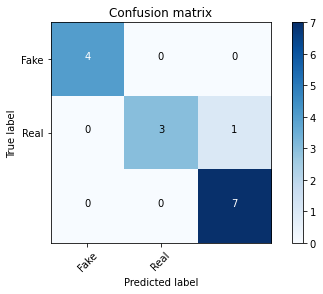

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

Passive Aggressive Classifier

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier

model = PassiveAggressiveClassifier(max_iter=10000, random_state=1,tol=1e-3).fit(X_train, y_train)

y_pred_pa = model.predict(X_test)
print('Accuracy: ', model.score(X_test, y_test))





Accuracy:  0.8


In [ ]:
print(classification_report(y_test,y_pred_pa))


              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.25      0.40         4
           2       0.78      1.00      0.88         7

    accuracy                           0.80        15
   macro avg       0.86      0.75      0.72        15
weighted avg       0.84      0.80      0.75        15



Confusion matrix, without normalization


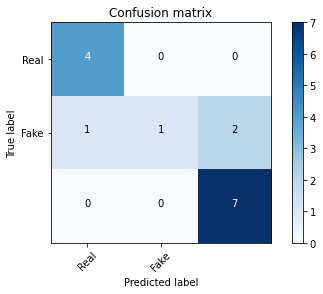

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred_pa)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

Multinomial NB

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(X_train, y_train)
pred = NB.predict(X_test)
print('Accuracy of NB classifier on test set: {:.2f}'
     .format(NB.score(X_test, y_test)))



Accuracy of NB classifier on test set: 0.80


Confusion matrix, without normalization


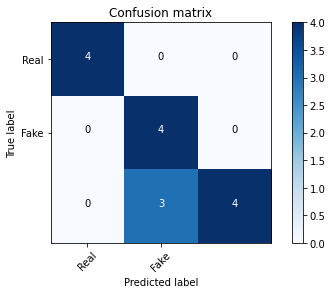

In [ ]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.57      1.00      0.73         4
           2       1.00      0.57      0.73         7

    accuracy                           0.80        15
   macro avg       0.86      0.86      0.82        15
weighted avg       0.89      0.80      0.80        15



Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(X_train, y_train)
pred_gbc = GBC.predict(X_test)
GBC.score(X_test, y_test)
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.80      1.00      0.89         4
           2       1.00      0.86      0.92         7

    accuracy                           0.93        15
   macro avg       0.93      0.95      0.94        15
weighted avg       0.95      0.93      0.93        15



In [ ]:
print('Accuracy:', GBC.score(X_test, y_test))

Accuracy: 0.9333333333333333


Confusion matrix, without normalization


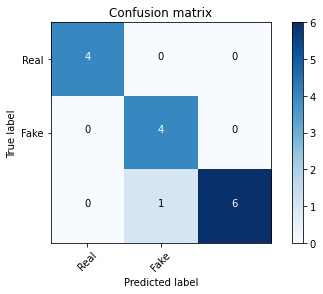

In [ ]:
cm = metrics.confusion_matrix(y_test, pred_gbc)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

In [ ]:
plt.savefig('GradientBoostingClassifier.jpg')

<Figure size 432x288 with 0 Axes>

K Nearest Neighbor(KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
print('Accuracy:', knn.score(X_test, y_test))
print('\n',classification_report(y_test, pred_knn))

Accuracy: 0.9333333333333333

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.80      1.00      0.89         4
           2       1.00      0.86      0.92         7

    accuracy                           0.93        15
   macro avg       0.93      0.95      0.94        15
weighted avg       0.95      0.93      0.93        15



Confusion matrix, without normalization


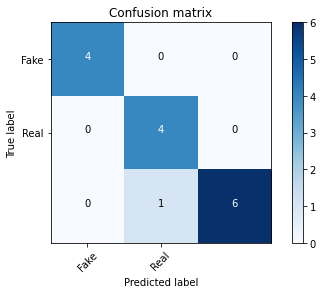

In [ ]:
cm = metrics.confusion_matrix(y_test, pred_knn)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])